In [2]:
# Importing Libraries 

import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
# Insert data into dataframe
df = pd.read_csv("mushrooms.csv")

In [5]:
#Display dataset
display(df.head()) 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
#Get Features and data type
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

None

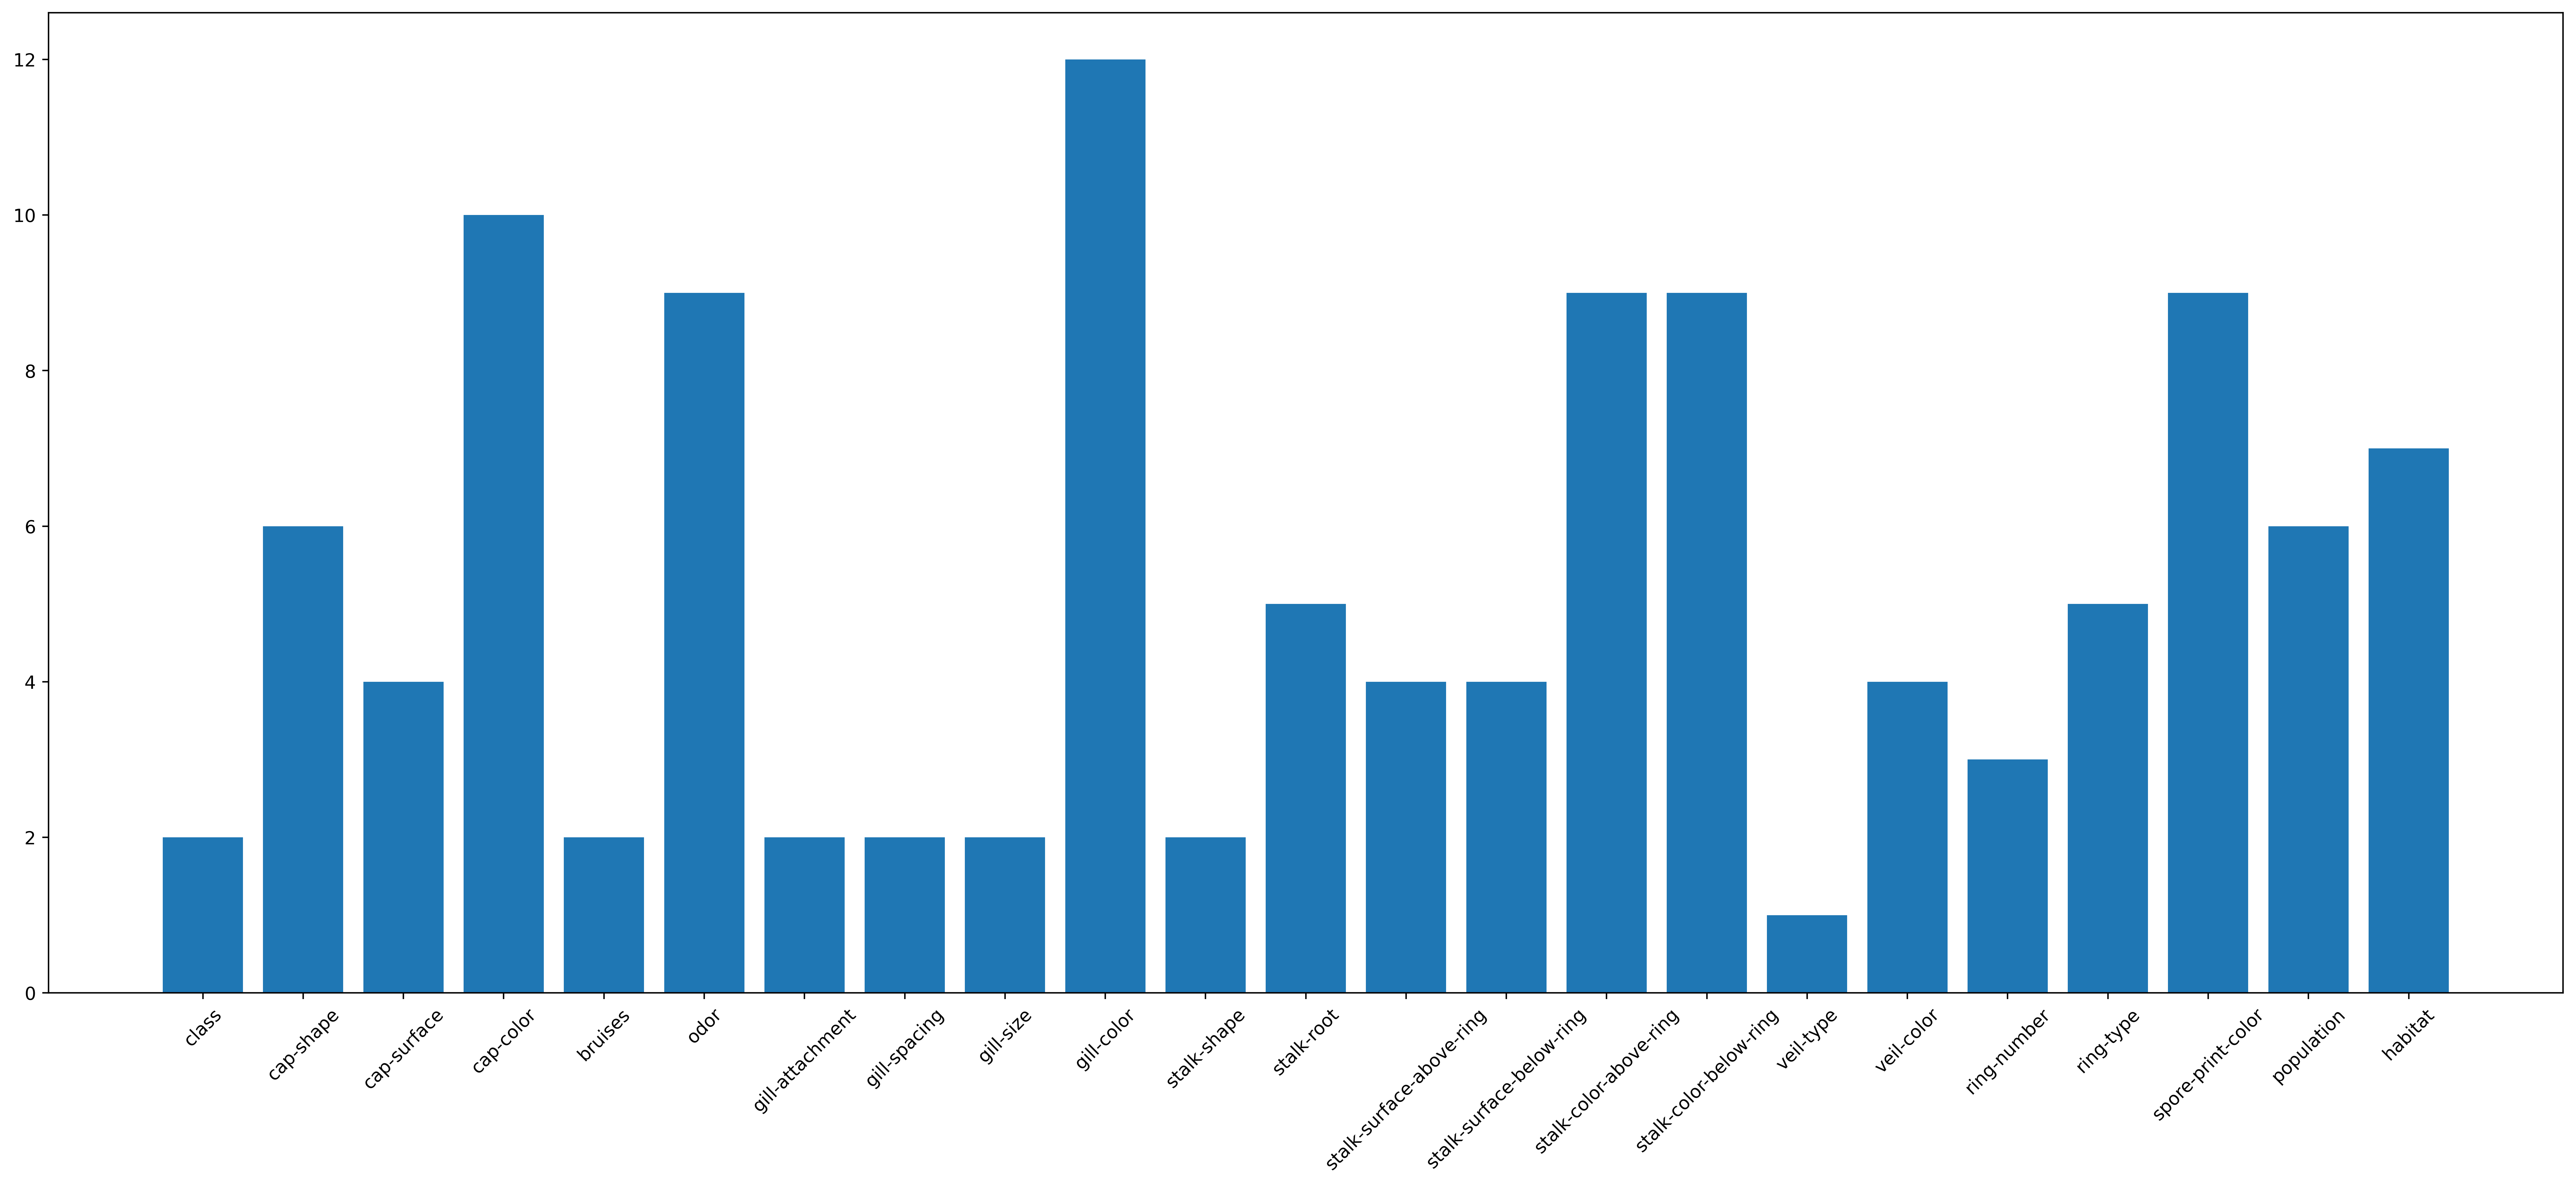

In [8]:
# Plot unique features 

plt.figure(figsize = (25,10), dpi=500)
plt.xticks(rotation= 45)
plt.bar(df.columns, df.nunique())
plt.show()

In [14]:
#remove veil type 

df = df.drop(['veil-type'], axis = 1)

In [15]:
#Checking the distribution of the data by divinding the two classes, edible and poisonous

edible = pd.value_counts(df['class'])[0]
display(edible)
poisonous = pd.value_counts(df['class'])[1]
display(poisonous)

4208

3916

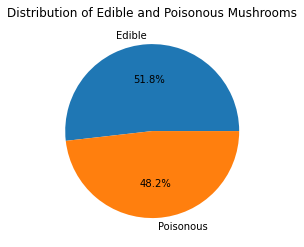

In [16]:
#Plot the data 

plt.pie([edible,poisonous], labels = ['Edible', 'Poisonous'],autopct='%1.1f%%' )
plt.title('Distribution of Edible and Poisonous Mushrooms')
plt.show()

In [17]:
#Separate the class column from the dataset 

y = df['class']
x = df.drop('class', axis = 1)

In [18]:
# Encode the data with one-hot

x = pd.get_dummies(x)

In [19]:
display(x.head())

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
#train test split

X1_train, x1_test, Y1_train, y1_test = train_test_split(x, y, test_size=0.3, random_state=1)

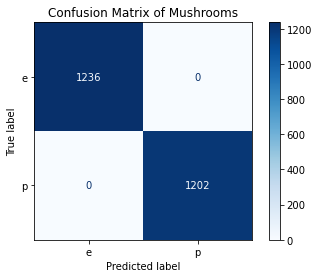

In [21]:
#make matrix for 3KNN

ClassMushroom = KNeighborsClassifier(n_neighbors = 3)
ClassMushroom.fit(X1_train,Y1_train)
y1_prediction = ClassMushroom.predict(x1_test)
Matrix = ConfusionMatrixDisplay(confusion_matrix(y1_test, y1_prediction), display_labels = ClassMushroom.classes_)
Matrix.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Mushrooms')

plt.show()

In [22]:
#Classification Report 
print(classification_report(y1_test, y1_prediction))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1236
           p       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [23]:
print (accuracy_score(y1_test,y1_prediction))

1.0


In [24]:
#test model with different K values
Kvalues = list(range(1, 41, 2))
accuracy1 = []

for k in Kvalues:
    ClassM = KNeighborsClassifier(n_neighbors = k)
    ClassM.fit(X1_train, Y1_train)
    y1pre = ClassM.predict(x1_test)
    Kaccuracy = accuracy_score(y1_test,y1pre)
    accuracy1.append(Kaccuracy)

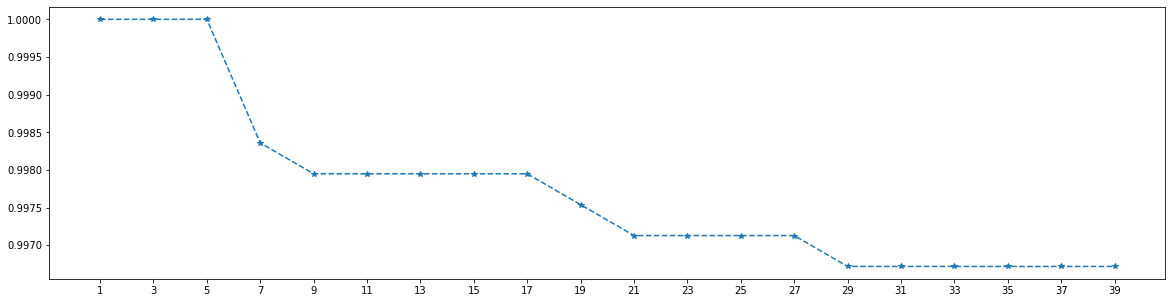

In [25]:
#Plot the K values and their accuracy rate

plt.figure(figsize = (20,5))
plt.plot(Kvalues, accuracy1, marker ='*', linestyle = '--')
plt.xticks(Kvalues, Kvalues)

plt.show()

In [26]:
# Cross validation 3KNN

knncv = KNeighborsClassifier(n_neighbors=3)
cv_scores1 = cross_val_score(knncv, x, y, cv=5)
print(cv_scores1)
print('cv_scores mean:{}'.format(np.mean(cv_scores1)))

[0.84492308 1.         0.99569231 1.         0.78078818]
cv_scores mean:0.9242807123910571


In [27]:
#cross validation of multiple Ks

krange = range(1,41,2)
kscore = []

for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5, scoring = 'accuracy')
    kscore.append(scores.mean())

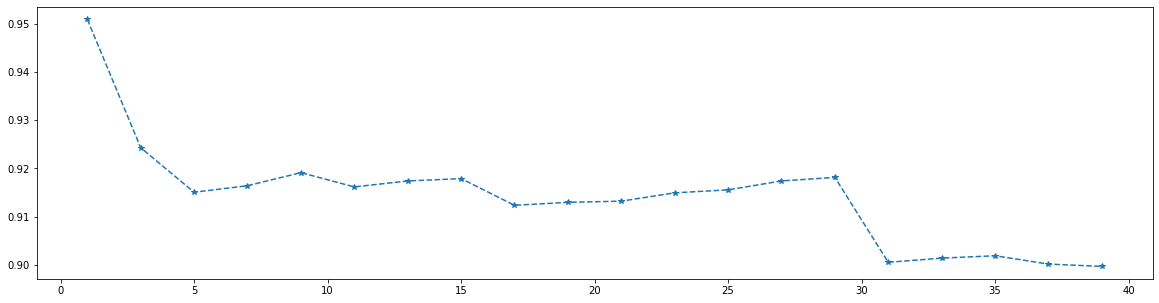

In [28]:
# Plot mean score of the Ks

plt.figure(figsize = (20,5))
plt.plot(krange, kscore, marker ='*', linestyle = '--')
plt.show()

In [29]:
#feature importance

FeatureImp = pd.get_dummies(df)
FeatureImp = FeatureImp.corr()

Importance_EM = FeatureImp['class_e'].sort_values(ascending = False)
Importance_PM = FeatureImp['class_p'].sort_values(ascending = False)

In [30]:
# Print feature importance

print('\n Top 5 Features for Edible Mushrooms \n')
print(Importance_EM[1:6])
print('\n Top 5 Features for Poisonous Mushrooms \n')
print(Importance_PM[1:6])


 Top 5 Features for Edible Mushrooms 

odor_n                        0.785557
ring-type_p                   0.540469
gill-size_b                   0.540024
bruises_t                     0.501530
stalk-surface-above-ring_s    0.491314
Name: class_e, dtype: float64

 Top 5 Features for Poisonous Mushrooms 

odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size_n                   0.540024
gill-color_b                  0.538808
Name: class_p, dtype: float64


In [33]:
#Feature importance

Empty = pd.DataFrame()
Empty['Edible'] = Importance_EM
Empty['Poisonous'] = Importance_PM
print(Empty.head())

               Edible  Poisonous
class_e      1.000000  -1.000000
odor_n       0.785557  -0.785557
ring-type_p  0.540469  -0.540469
gill-size_b  0.540024  -0.540024
bruises_t    0.501530  -0.501530


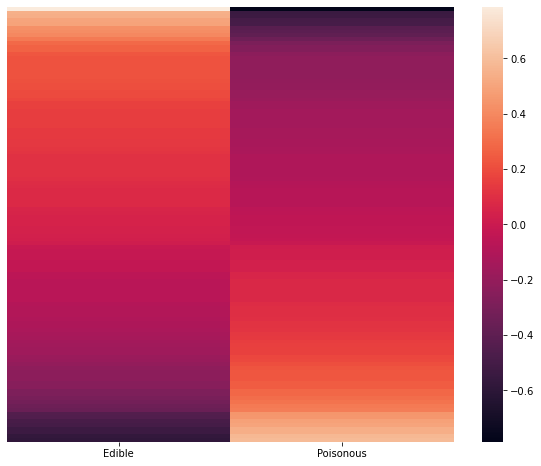

In [34]:
# Heat map of features 

Empty = Empty[1: -2]
plt.figure(figsize=(10,8))
sns.heatmap(Empty, yticklabels = False)
plt.show()